In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_accuracy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_accuracy
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_accuracy'].max()
Min = Mexico['review_scores_accuracy'].min()
Limites = [Min, Max]
Limites

[3.83, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.17

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.07457154341240058

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.83, 5, 16)
intervalos

array([3.83 , 3.908, 3.986, 4.064, 4.142, 4.22 , 4.298, 4.376, 4.454,
       4.532, 4.61 , 4.688, 4.766, 4.844, 4.922, 5.   ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_accuracy'] = pd.cut ( x = Mexico ['review_scores_accuracy'], bins = intervalos, labels = categorias )
Mexico['review_scores_accuracy']

0        Categoria14
1        Categoria10
2        Categoria13
3        Categoria14
4        Categoria15
            ...     
26577    Categoria14
26578    Categoria14
26579    Categoria14
26580    Categoria14
26581    Categoria14
Name: review_scores_accuracy, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['review_scores_accuracy'])
table1

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Categoria15,8755,0.329358,0.329519
1,Categoria14,8467,0.318524,0.648199
2,Categoria13,3629,0.136521,0.784787
3,Categoria12,2001,0.075277,0.860100
4,Categoria11,1142,0.042961,0.903083
5,Categoria10,703,0.026446,0.929542
6,Categoria9,602,0.022647,0.952200
7,Categoria3,407,0.015311,0.967519
8,Categoria8,288,0.010834,0.978358
9,Categoria7,233,0.008765,0.987128


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_accuracy,frequency
0,Categoria15,8755
1,Categoria14,8467
2,Categoria13,3629
3,Categoria12,2001
4,Categoria11,1142
5,Categoria10,703
6,Categoria9,602
7,Categoria3,407
8,Categoria8,288
9,Categoria7,233


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_accuracy')
Filtro_index

,frequency
review_scores_accuracy,
Categoria15,8755
Categoria14,8467
Categoria13,3629
Categoria12,2001
Categoria11,1142
Categoria10,703
Categoria9,602
Categoria3,407
Categoria8,288


Text(0, 0.5, 'Frecuencia')

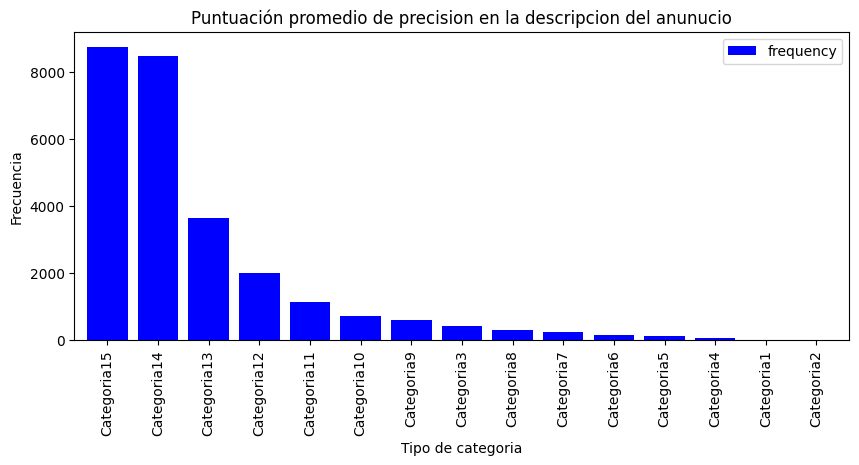

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la descripcion del anunucio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')